In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split

In [2]:
from sklearn.datasets import load_iris

In [19]:
iris = load_iris()

dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [20]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df["target"] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [21]:
iris.target_names


A = {0 : iris.target_names[0],
     1 : iris.target_names[1],
     2 : iris.target_names[2]}

df['target'] = df["target"].map(A)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [22]:
# random forest

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2 , random_state = 0)

print("X_train's size : ", len(x_train))
print("y_train's size : ", len(y_train))
print("X_test's size : ", len(x_test))
print("y_test's size : ", len(y_test))


X_train's size :  120
y_train's size :  120
X_test's size :  30
y_test's size :  30


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


rf = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [24]:
rf.predict(x_test)

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa'], dtype=object)

In [25]:
accuracy = accuracy_score(y_test, rf.predict(x_test))

In [26]:
accuracy

1.0

In [27]:
def changing(a):
    return iris.target_names[a]

In [28]:
pip list

Package                 Version
----------------------- ---------
absl-py                 0.13.0
appnope                 0.1.2
argon2-cffi             20.1.0
astunparse              1.6.3
async-generator         1.10
attrs                   21.2.0
backcall                0.2.0
bleach                  4.0.0
cachetools              4.2.2
certifi                 2021.5.30
cffi                    1.14.6
charset-normalizer      2.0.4
clang                   5.0
cycler                  0.10.0
debugpy                 1.4.1
decorator               5.0.9
defusedxml              0.7.1
entrypoints             0.3
flatbuffers             1.12
gast                    0.4.0
google-auth             1.35.0
google-auth-oauthlib    0.4.5
google-pasta            0.2.0
grpcio                  1.39.0
h5py                    3.1.0
idna                    3.2
ipykernel               6.0.3
ipython                 7.26.0
ipython-genutils        0.2.0
ipywidgets              7.6.3
jedi                    0.18.0

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [30]:
train = pd.read_csv("train.csv")
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [32]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [33]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [34]:
def show_pie_chart(df, col_name):
    colname_survived = survived_crosstab(train, col_name)
    pie_chart(colname_survived)
    return colname_survived

def survived_crosstab(df, col_name):
    '''col_name과 Survived간의 교차도표 생성'''
    feature_survived = pd.crosstab(df[col_name], df['Survived'])
    feature_survived.columns = feature_survived.columns.map({0:"Dead", 1:"Alive"})
    return feature_survived

def pie_chart(feature_survived):
    '''
    pie_chart 생성
    pcol, prow = 차트를 출력할 개수. pcol * prow 만큼의 차트 출력 
    '''
    frows, fcols = feature_survived.shape
    pcol = 3
    prow = (frows/pcol + frows%pcol)
    plot_height = prow * 2.5
    plt.figure(figsize=(8, plot_height))

    for row in range(0, frows):
        plt.subplot(prow, pcol, row+1)

        index_name = feature_survived.index[row]
        plt.pie(feature_survived.loc[index_name], labels=feature_survived.loc[index_name].index, autopct='%1.1f%%')
        plt.title("{0}' survived".format(index_name))

    plt.show()

/var/folders/jl/wmntyy4d25q2v0ldmswng8040000gn/T/ipykernel_2349/1326270291.py:24: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(prow, pcol, row+1)


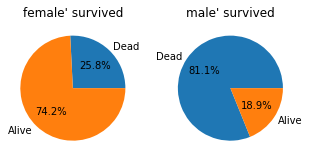

Survived,Dead,Alive
Sex,,
female,81,233
male,468,109


In [35]:
c = show_pie_chart(train, 'Sex')
c

/var/folders/jl/wmntyy4d25q2v0ldmswng8040000gn/T/ipykernel_2349/1326270291.py:24: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(prow, pcol, row+1)


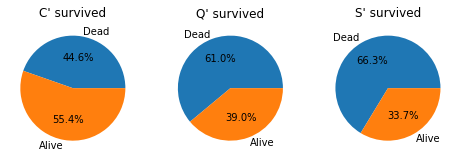

Survived,Dead,Alive
Embarked,,
C,75,93
Q,47,30
S,427,217


In [36]:
c = show_pie_chart(train, 'Embarked')
c


In [37]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [38]:
train["Sex"] = train["Sex"].map({"female" : 0, "male" : 1})

In [39]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

def feature_engineering(df):
    # Sex
    df['Sex'] = df['Sex'].map({'female': 0, 'male': 1})

    # Embarked
    df.Embarked.fillna('S', inplace=True)
    df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

    # Title
    df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.')
    df['Title'] = df['Title'].replace(['Capt', 'Col', 'Countess', 'Don','Dona', 'Dr', 'Jonkheer', 'Lady','Major', 'Rev', 'Sir'], 'Other')
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs':3, 'Other':4})

    # Age
    meanAge = df[['Title', 'Age']].groupby(['Title']).mean()
    for index, row in meanAge.iterrows():
        nullIndex = df[(df.Title == index) & (df.Age.isnull())].index
        df.loc[nullIndex, 'Age'] = row[0]

    df['AgeCategory'] = pd.qcut(df.Age, 8, labels=range(1, 9))
    df.AgeCategory = df.AgeCategory.astype(int)

    # Cabin
    df.Cabin.fillna('N', inplace=True)
    df["CabinCategory"] = df["Cabin"].str.slice(start=0, stop=1)
    df["CabinCategory"] = df['CabinCategory'].map({ "N": 0, "C": 1, "B": 2, "D": 3, "E": 4, "A": 5, "F": 6, "G": 7, "T": 8 })

    # Fare
    df.Fare.fillna(0, inplace=True)
    df['FareCategory'] = pd.qcut(df.Fare, 8, labels=range(1, 9))
    df.FareCategory = df.FareCategory.astype(int)

    # SibSp, Parch
    df['Family'] = df['SibSp'] + df['Parch'] + 1
    df.loc[df["Family"] > 4, "Family"] = 5

    df['IsAlone'] = 1
    df.loc[df['Family'] > 1, 'IsAlone'] = 0

    # Ticket
    df['TicketCategory'] = df.Ticket.str.split()
    df['TicketCategory'] = [i[-1][0] for i in df['TicketCategory']]
    df['TicketCategory'] = df['TicketCategory'].replace(['8', '9', 'L'], '8')
    df['TicketCategory'] = pd.factorize(df['TicketCategory'])[0] + 1

    df.drop(['PassengerId', 'Ticket', 'Cabin', 'Fare', 'Name', 'Age', 'SibSp', 'Parch'], axis=1, inplace=True)

    return df

train = feature_engineering(train)
test = feature_engineering(test)

train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Survived        891 non-null    int64
 1   Pclass          891 non-null    int64
 2   Sex             891 non-null    int64
 3   Embarked        891 non-null    int64
 4   Title           891 non-null    int64
 5   AgeCategory     891 non-null    int64
 6   CabinCategory   891 non-null    int64
 7   FareCategory    891 non-null    int64
 8   Family          891 non-null    int64
 9   IsAlone         891 non-null    int64
 10  TicketCategory  891 non-null    int64
dtypes: int64(11)
memory usage: 76.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Pclass          418 non-null    int64
 1   Sex             418 non-null    int64
 2   Embarked      

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X= train.iloc[:,:-1]
y = train.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 0)

In [41]:
rf = RandomForestClassifier(n_estimators = 50, criterion = "entropy", max_depth = 5, oob_score = True, random_state = 10)
rf.fit(X_train, y_train)

prediction = rf.predict(X_test)


In [42]:
accuracy = accuracy_score(y_test, prediction)

print("총 {}명 중 {:.2f}% 정확도로 생존을 맞춤".format(len(prediction),accuracy*100))

총 357명 중 80.11% 정확도로 생존을 맞춤


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

RF_classifier = RandomForestClassifier()

RF_paramgrid = {
    'max_depth' : [6, 8, 10, 15],
    'n_estimators': [50, 100, 300, 500, 700, 800, 900],
    'max_features': ['sqrt'],
    'min_samples_split': [2, 7, 15, 30],
    'min_samples_leaf': [1, 15, 30, 60],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
    }

k_fold = StratifiedKFold(n_splits=5)
RF_classifiergrid = GridSearchCV(RF_classifier, param_grid = RF_paramgrid, cv=k_fold, scoring="accuracy", n_jobs= -1, verbose=1)

RF_classifiergrid.fit(X_train, y_train)

Fitting 5 folds for each of 1792 candidates, totalling 8960 fits


In [ ]:
rf = RF_classifiergrid.best_estimator_

In [ ]:
import matplotlib.pyplot as plt
from pandas import Series

feature_importance = rf.feature_importances_
fi = Series(feature_importance, index=train.drop(['Survived'], axis=1).columns)

plt.figure(figsize=(8, 8))
fi.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# data 분리 
data = train.drop('Survived', axis=1).values
target = train['Survived'].values
x_train, x_valid, y_train, y_valid = train_test_split(data, target, test_size=0.4, stratify=target, random_state=0)

# 모델 적용 함수 
def ml_fit(model):
    model.fit(x_train, y_train)
    prediction = model.predict(x_valid)
    accuracy = accuracy_score(prediction, y_valid)
    print(model)
    print(f'총 {y_valid.shape[0]}명 중 {accuracy * 100:.3f}% 정확도로 생존을 맞춤')
    return model

# 기본 설정으로만 테스트 
model = ml_fit(RandomForestClassifier(n_estimators=100))
model = ml_fit(LogisticRegression(solver='lbfgs'))
model = ml_fit(SVC(gamma='scale'))
model = ml_fit(KNeighborsClassifier())
model = ml_fit(GaussianNB())
model = ml_fit(DecisionTreeClassifier())

In [ ]:
model = ml_fit(RandomForestClassifier(n_estimators=50, criterion="entropy", max_depth=5, oob_score=True, random_state=10))


In [4]:
import sklearn.linear_model

In [5]:
dir(sklearn.linear_model)

['ARDRegression',
 'BayesianRidge',
 'ElasticNet',
 'ElasticNetCV',
 'GammaRegressor',
 'Hinge',
 'Huber',
 'HuberRegressor',
 'Lars',
 'LarsCV',
 'Lasso',
 'LassoCV',
 'LassoLars',
 'LassoLarsCV',
 'LassoLarsIC',
 'LinearRegression',
 'Log',
 'LogisticRegression',
 'LogisticRegressionCV',
 'ModifiedHuber',
 'MultiTaskElasticNet',
 'MultiTaskElasticNetCV',
 'MultiTaskLasso',
 'MultiTaskLassoCV',
 'OrthogonalMatchingPursuit',
 'OrthogonalMatchingPursuitCV',
 'PassiveAggressiveClassifier',
 'PassiveAggressiveRegressor',
 'Perceptron',
 'PoissonRegressor',
 'RANSACRegressor',
 'Ridge',
 'RidgeCV',
 'RidgeClassifier',
 'RidgeClassifierCV',
 'SGDClassifier',
 'SGDRegressor',
 'SquaredLoss',
 'TheilSenRegressor',
 'TweedieRegressor',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_bayes',
 '_cd_fast',
 '_coordinate_descent',
 '_glm',
 '_huber',
 '_least_angle',
 '_logistic',
 '_omp',
 '_pa

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [11]:
cancer = load_breast_cancer()

In [17]:
x = cancer.data
y = cancer.target
x_train, x_test, y_train, y_test = train_test_split(x,y,stratify =y, 
                                                    test_size = 0.2, random_state = 42)

In [18]:
from sklearn.linear_model import SGDClassifier

In [19]:
sgd = SGDClassifier(loss = 'log', random_state = 42)
sgd.fit(x_train, y_train)
sgd.score(x_test,y_test)

0.8333333333333334

In [20]:
sgd = SGDClassifier(loss = 'hinge', random_state = 42)
sgd.fit(x_train, y_train)
sgd.score(x_test,y_test)

0.9385964912280702

In [21]:
x_train_train, x_train_val, y_train_train, y_train_val = train_test_split(x_train,y_train, stratify = y_train, test_size = 0.2 , random_state = 42)

In [23]:
print(len(x_train_train), len(x_train_val))

364 91


In [26]:
sgd = SGDClassifier(loss='log', random_state=42)
sgd.fit(x_train_train, y_train_train)
sgd.score(x_train_val, y_train_val)

0.6923076923076923

['mean perimeter']


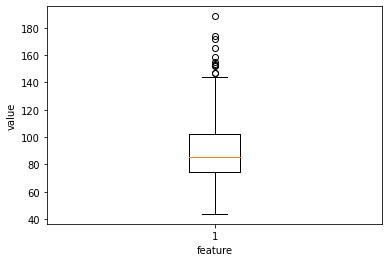

In [29]:
print(cancer.feature_names[[2]])
plt.boxplot(x_train_train[:,2:3])
plt.xlabel("feature")
plt.ylabel("value")
plt.show()

['mean perimeter' 'mean area']


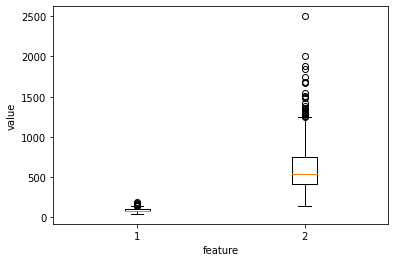

In [30]:
print(cancer.feature_names[[2,3]])
plt.boxplot(x_train_train[:,2:4])
plt.xlabel("feature")
plt.ylabel("value")
plt.show()

In [41]:
class SingleLayer:
    def __init__(self, learning_rate = 0.1, l1 = 0, l2 =0):
        self.w = None
        self.b = None
        self.losses = []
        self.val_losses = []
        self.w_history = []
        self.lr = learning_rate
        self.l1 = l1
        self.l2 = l2
        
    def forpass(self,x):
        z = np.sum(x*self.w) + self.b
        return z
    
    def backprop(self,x,err):
        w_grad = x*err
        b_grad = 1*err
        return w_grad, b_grad
    
    def activation(self,z):
        z = np.clip(z,-100,None)
        a = 1/(1+np.exp(-z))
        return a
    
    
    def fit(self,x,y, epochs = 100, x_val = None, y_val = None):
        self.w = np.ones(x.shape[1])
        self.b = 0
        self.w_history.append(self.w.copy())
        np.random.seed(42)
        for i in range(epochs):
            loss = 0
            
            indexes = np.random.permutation(np.arange(len(x)))
            for i in indexes:
                z = self.forpass(x[i])
                a = self.activation(z)
                err = -(y[i]-a)
                w_grad, b_grad = self.backprop(x[i], err)
                w_grad +=self.l1*np.sign(self.w) + self.l2*self.w
                
                self.w -=self.lr*w_grad
                self.b -=b_grad
                self.w_history.append(self.w.copy())
                a = np.clip(a,1e-10,1-1e-10)
                loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
                
            self.losses.append(loss/len(y)+ self.reg_loss())
            self.update_val_loss(x_val,y_val)
            
    def predict(self,x):
        z = [self.forpass(x_i) for x_i in x]
        return np.array(z) >=0
    
    def score(self,x,y):
        return np.mean(self.predict(x)==y)
        
    def reg_loss(self):
        return self.l1*np.sum(np.abs(self.w)+self.l2/2*np.sum(self.w**2))
    
    def update_val_loss(self,x_val,y_val):
        if x_val is None:
            return
        val_loss = 0
        for i in range(len(x_val)):
            z = self.forpass(x_val[i])     # 정방향 계산
            a = self.activation(z)         # 활성화 함수 적용
            a = np.clip(a, 1e-10, 1-1e-10)
            val_loss += -(y_val[i]*np.log(a)+(1-y_val[i])*np.log(1-a))
        self.val_losses.append(val_loss/len(y_val) + self.reg_loss())

In [42]:
layer1 = SingleLayer()
layer1.fit(x_train_train, y_train_train)
layer1.score(x_train_val, y_train_val)

0.9120879120879121

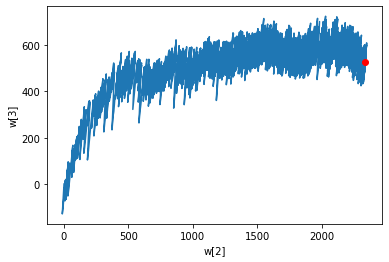

In [52]:
w2 = []
w3 = []

for w in layer1.w_history:
    w2.append(w[2])
    w3.append(w[3])
    
plt.plot(w2,w3)
plt.plot(w2[-1],w3[-1],'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()

In [56]:
train_mean = np.mean(x_train_train, axis = 0)
train_std = np.std(x_train_train, axis = 0)
x_train_scaled = (x_train_train-train_mean)/ train_std
x_train_scaled

array([[ 0.21529445, -0.3313719 ,  0.17983103, ..., -0.48870759,
         1.0446075 , -0.6393202 ],
       [-0.6557398 , -1.14919128, -0.71043609, ..., -0.49139007,
         0.27379602, -0.9632616 ],
       [ 0.18967579,  0.55160342,  0.16625487, ...,  1.00632788,
         1.19598931,  1.3439391 ],
       ...,
       [ 0.11281983, -0.88856752,  0.10125385, ...,  0.65611522,
        -0.35953605, -0.42335927],
       [ 0.96108195,  1.44356576,  0.94585569, ..., -0.08901809,
        -2.0401831 , -0.8927216 ],
       [-0.74398184, -0.41000838, -0.73429722, ..., -0.77275241,
        -0.52482027, -0.19925911]])

In [57]:
layer2 = SingleLayer()
layer2.fit(x_train_scaled, y_train_train)

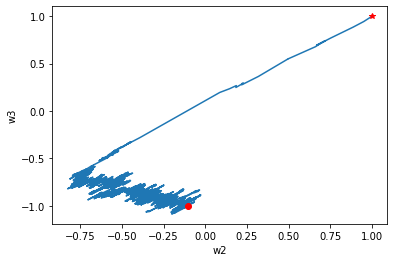

In [62]:
w2 = []
w3 = []
for w in layer2.w_history:
    w2.append(w[2])
    w3.append(w[3])
    
plt.plot(w2,w3)
plt.plot(w2[-1],w3[-1],'ro')
plt.plot(w2[0],w3[0],'r*')
plt.xlabel('w2')
plt.ylabel('w3')
plt.show()

In [65]:
layer2.score(x_train_val,y_train_val)

0.37362637362637363

In [66]:
val_mean = np.mean(x_train_val, axis = 0)
val_std = np.std(x_train_val,axis = 0)
x_val_scaled = (x_train_val-val_mean)/ val_std
layer2.score(x_val_scaled, y_train_val)

0.967032967032967

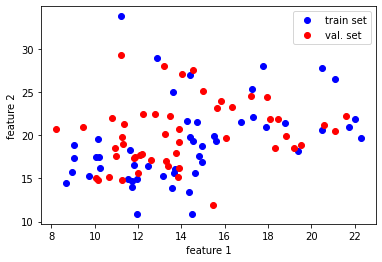

In [67]:
plt.plot(x_train_train[:50, 0], x_train_train[:50, 1], 'bo')
plt.plot(x_train_val[:50, 0], x_train_val[:50, 1], 'ro')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(['train set', 'val. set'])
plt.show()

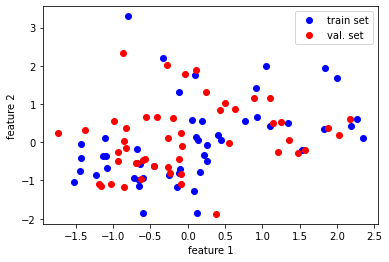

In [68]:
plt.plot(x_train_scaled[:50, 0], x_train_scaled[:50, 1], 'bo')
plt.plot(x_val_scaled[:50, 0], x_val_scaled[:50, 1], 'ro')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(['train set', 'val. set'])
plt.show()

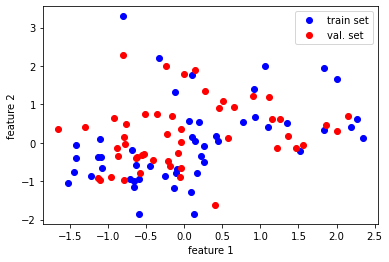

In [69]:
x_val = (x_train_val-train_mean)/ train_std


plt.plot(x_train_scaled[:50, 0], x_train_scaled[:50, 1], 'bo')
plt.plot(x_val[:50, 0], x_val[:50, 1], 'ro')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(['train set', 'val. set'])
plt.show()

In [73]:
layer2.score(x_val_scaled, y_train_val)

0.967032967032967

In [70]:
layer2.score(x_val, y_train_val)

0.967032967032967

In [76]:
layer3 = SingleLayer()
layer3.fit(x_train_scaled, y_train_train, x_val = x_val, y_val = y_train_val)

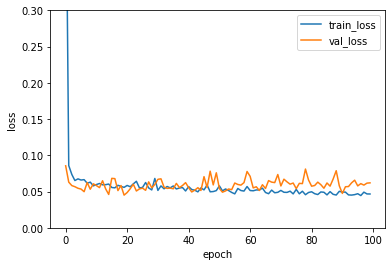

In [78]:
plt.ylim(0, 0.3)
plt.plot(layer3.losses)
plt.plot(layer3.val_losses)
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train_loss","val_loss"])
plt.show()

In [80]:
layer4 = SingleLayer()
layer4.fit(x_train_scaled, y_train_train, epochs = 100)
layer4.score(x_val, y_train_val)

0.967032967032967

In [81]:
layer4 = SingleLayer()
layer4.fit(x_train_scaled, y_train_train, epochs = 20)
layer4.score(x_val, y_train_val)

0.978021978021978

In [85]:
layer4.w.shape

(30,)

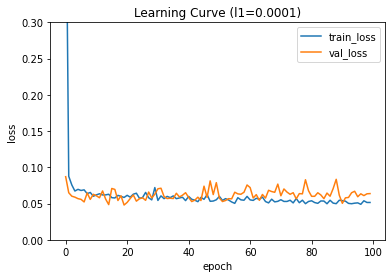

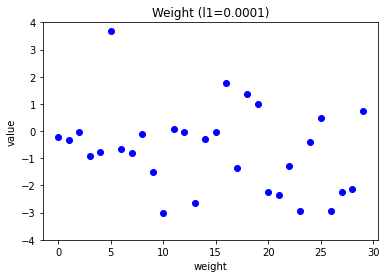

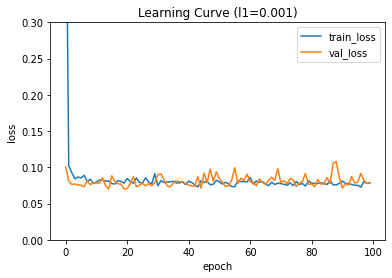

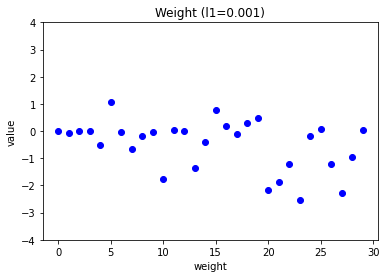

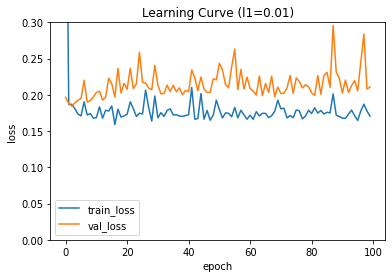

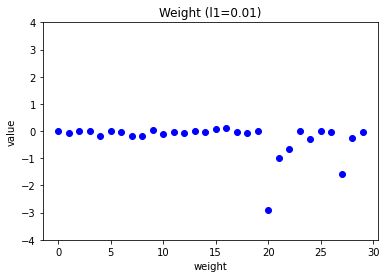

In [82]:
l1_list = [0.0001, 0.001, 0.01]

for l1 in l1_list:
    lyr = SingleLayer(l1=l1)
    lyr.fit(x_train_scaled, y_train_train, x_val=x_val, y_val=y_train_val)
    
    plt.plot(lyr.losses)
    plt.plot(lyr.val_losses)
    plt.title('Learning Curve (l1={})'.format(l1))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'val_loss'])
    plt.ylim(0, 0.3)
    plt.show()
    
    plt.plot(lyr.w, 'bo')
    plt.title('Weight (l1={})'.format(l1))
    plt.ylabel('value')
    plt.xlabel('weight')
    plt.ylim(-4, 4)
    plt.show()

In [88]:
layer5 = SingleLayer(l1=0.001)
layer5.fit(x_train_scaled, y_train_train, epochs=20)
layer5.score(x_val, y_train_val)

0.978021978021978

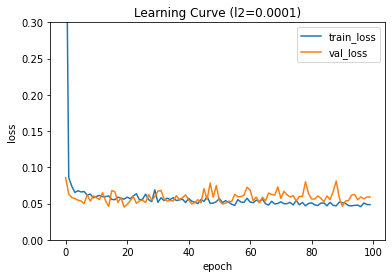

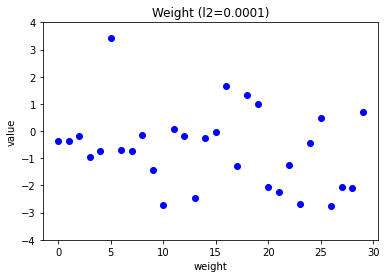

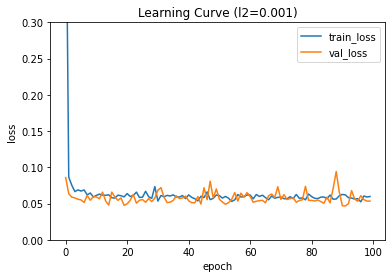

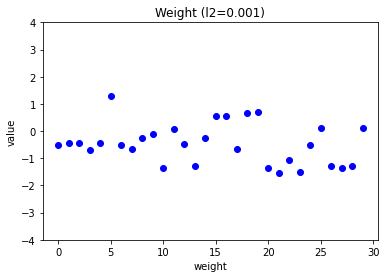

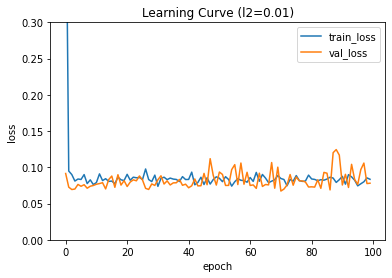

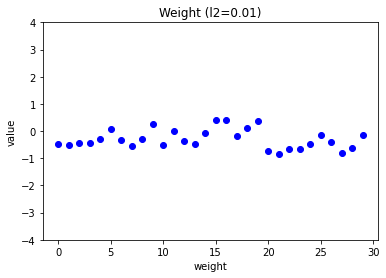

In [89]:
l2_list = [0.0001, 0.001, 0.01]

for l2 in l2_list:
    lyr = SingleLayer(l2=l2)
    lyr.fit(x_train_scaled, y_train_train, x_val=x_val, y_val=y_train_val)
    
    plt.plot(lyr.losses)
    plt.plot(lyr.val_losses)
    plt.title('Learning Curve (l2={})'.format(l2))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'val_loss'])
    plt.ylim(0, 0.3)
    plt.show()
    
    plt.plot(lyr.w, 'bo')
    plt.title('Weight (l2={})'.format(l2))
    plt.ylabel('value')
    plt.xlabel('weight')
    plt.ylim(-4, 4)
    plt.show()

In [91]:
layer6 = SingleLayer(l2=0.01)
layer6.fit(x_train_scaled, y_train_train, epochs=50)
layer6.score(x_val, y_train_val)

0.978021978021978

In [93]:
print(np.sum(layer6.predict(x_val)==y_train_val))
print(len(layer6.predict(x_val)))

89
91


In [94]:
sgd = SGDClassifier(loss='log', penalty='l2', alpha=0.001, random_state=42)
sgd.fit(x_train_scaled, y_train_train)
sgd.score(x_val, y_train_val)

0.978021978021978

In [96]:
sgd = SGDClassifier(loss='hinge', alpha=0.001, random_state=42)
sgd.fit(x_train_scaled, y_train_train)
sgd.score(x_val, y_train_val)

0.978021978021978

In [97]:
validation_scores = []

In [99]:
x_train_all = x_train
y_train_all = y_train

In [108]:
k= 10
bins = len(x_train_all) //k

for i in range(k):
    start = i*bins
    end = (i+1)*bins
    val_fold = x_train_all[start:end]
    val_target = y_train_all[start:end]
    
    train_index = list(range(0,start)) + list(range(end, len(x_train_all)))
    train_fold = x_train_all[train_index]
    train_target = y_train_all[train_index]
    
    train_mean = np.mean(train_fold,axis = 0)
    train_std = np.std(train_fold, axis = 0)
    train_fold_scaled = (train_fold -train_mean)/ train_std
    val_fold_scaled = (val_fold - train_mean)/ train_std
    
    lyr = SingleLayer(l2 = 0.01)
    lyr.fit(train_fold_scaled, train_target, epochs = 50)
    score = lyr.score(val_fold_scaled, val_target)
    validation_scores.append(score)
    
print(np.mean(validation_scores))

0.971111111111111


In [123]:
from sklearn.model_selection import cross_validate
sgd = SGDClassifier(loss = 'log', penalty = 'l2', alpha = 0.001, random_state = 42)
score = cross_validate(sgd, x_train_all, y_train_all, cv = 10)
print(np.mean(score["test_score"]))

0.850096618357488


In [125]:
print(score["test_score"])

[0.86956522 0.97826087 0.82608696 0.63043478 0.91304348 0.88888889
 0.62222222 0.57777778 0.93333333 0.68888889]


In [127]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [129]:
pipe = make_pipeline(StandardScaler(), sgd)
scores = cross_validate(pipe, x_train_all, y_train_all, cv = 10, return_train_score = True)
print(np.mean(scores["test_score"]))

0.9714975845410627


# Chapter 6
**Make two layers instead of one layer**

In [246]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [247]:
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify=y, 
                                                            test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, 
                                                  test_size=0.2, random_state=42)

In [248]:
print("{}'s shape':".format("x_train_all"), x_train_all.shape)
print("{}'s shape':".format("x_train"),x_train.shape)
print("{}'s shape':".format("x_val"),x_val.shape)

x_train_all's shape': (455, 30)
x_train's shape': (364, 30)
x_val's shape': (91, 30)


In [249]:
class SingleLayer:
    
    def __init__(self, learning_rate=0.1, l1=0, l2=0):
        self.w = None              # 가중치
        self.b = None              # 절편
        self.losses = []           # 훈련 손실
        self.val_losses = []       # 검증 손실
        self.w_history = []        # 가중치 기록
        self.lr = learning_rate    # 학습률
        self.l1 = l1               # L1 손실 하이퍼파라미터
        self.l2 = l2               # L2 손실 하이퍼파라미터

    def forpass(self, x):
        z = np.dot(x, self.w) + self.b        # 선형 출력을 계산합니다.
        return z

    def backprop(self, x, err):
        m = len(x)
        w_grad = np.dot(x.T, err) / m         # 가중치에 대한 그래디언트를 계산합니다.
        b_grad = np.sum(err) / m              # 절편에 대한 그래디언트를 계산합니다.
        return w_grad, b_grad

    def activation(self, z):
        z = np.clip(z, -100, None)            # 안전한 np.exp() 계산을 위해
        a = 1 / (1 + np.exp(-z))              # 시그모이드 계산
        return a
        
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        y = y.reshape(-1, 1)                  # 타깃을 열 벡터로 바꿉니다.
        y_val = y_val.reshape(-1, 1)
        m = len(x)                            # 샘플 개수를 저장합니다.
        self.w = np.ones((x.shape[1], 1))     # 가중치를 초기화합니다.
        self.b = 0                            # 절편을 초기화합니다.
        self.w_history.append(self.w.copy())  # 가중치를 기록합니다.
        # epochs만큼 반복합니다.
        for i in range(epochs):
            z = self.forpass(x)               # 정방향 계산을 수행합니다.
            a = self.activation(z)            # 활성화 함수를 적용합니다.
            err = -(y - a)                    # 오차를 계산합니다.
            # 오차를 역전파하여 그래디언트를 계산합니다.
            w_grad, b_grad = self.backprop(x, err)
            # 그래디언트에 페널티 항의 미분 값을 더합니다.
            w_grad += (self.l1 * np.sign(self.w) + self.l2 * self.w) / m
            # 가중치와 절편을 업데이트합니다.
            self.w -= self.lr * w_grad
            self.b -= self.lr * b_grad
            # 가중치를 기록합니다.
            self.w_history.append(self.w.copy())
            # 안전한 로그 계산을 위해 클리핑합니다.
            a = np.clip(a, 1e-10, 1-1e-10)
            # 로그 손실과 규제 손실을 더하여 리스트에 추가합니다.
            loss = np.sum(-(y*np.log(a) + (1-y)*np.log(1-a)))
            self.losses.append((loss + self.reg_loss()) / m)
            # 검증 세트에 대한 손실을 계산합니다.
            self.update_val_loss(x_val, y_val)
    
    def predict(self, x):
        z = self.forpass(x)      # 정방향 계산을 수행합니다.
        return z > 0             # 스텝 함수를 적용합니다.
    
    def score(self, x, y):
        # 예측과 타깃 열 벡터를 비교하여 True의 비율을 반환합니다.
        return np.mean(self.predict(x) == y.reshape(-1, 1))
    
    def reg_loss(self):
        # 가중치에 규제를 적용합니다.
        return self.l1 * np.sum(np.abs(self.w)) + self.l2 / 2 * np.sum(self.w**2)
    
    def update_val_loss(self, x_val, y_val):
        z = self.forpass(x_val)            # 정방향 계산을 수행합니다.
        a = self.activation(z)             # 활성화 함수를 적용합니다.
        a = np.clip(a, 1e-10, 1-1e-10)     # 출력 값을 클리핑합니다.
        # 로그 손실과 규제 손실을 더하여 리스트에 추가합니다.
        val_loss = np.sum(-(y_val*np.log(a) + (1-y_val)*np.log(1-a)))
        self.val_losses.append((val_loss + self.reg_loss()) / len(y_val))

In [250]:
from sklearn.preprocessing import StandardScaler

In [251]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_val_scaled = scaler.transform(x_val)

In [252]:
single_layer = SingleLayer(l2=0.01)
single_layer.fit(x_train_scaled, y_train, 
                 x_val=x_val_scaled, y_val=y_val, epochs=10000)
single_layer.score(x_val_scaled, y_val)

0.978021978021978

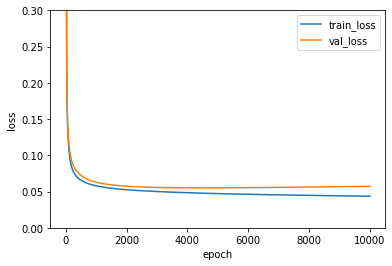

In [253]:
plt.ylim(0,0.3)
plt.plot(single_layer.losses)
plt.plot(single_layer.val_losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(["train_loss", "val_loss"])
plt.show()

Text(0, 0.5, 'w[3]')

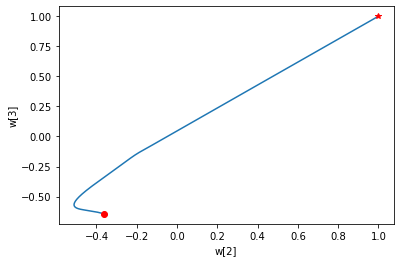

In [254]:
w2 = []
w3 = []
for w in single_layer.w_history:
    w2.append(w[2])
    w3.append(w[3])
    
plt.plot(w2,w3)
plt.plot(w2[0],w3[0],'r*')
plt.plot(w2[-1],w3[-1],'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')

In [255]:
class DualLayer(SingleLayer):
    
    def __init__(self, units=10, learning_rate=0.1, l1=0, l2=0):
        self.units = units         # 은닉층의 뉴런 개수
        self.w1 = None             # 은닉층의 가중치
        self.b1 = None             # 은닉층의 절편
        self.w2 = None             # 출력층의 가중치
        self.b2 = None             # 출력층의 절편
        self.a1 = None             # 은닉층의 활성화 출력
        self.losses = []           # 훈련 손실
        self.val_losses = []       # 검증 손실
        self.lr = learning_rate    # 학습률
        self.l1 = l1               # L1 손실 하이퍼파라미터
        self.l2 = l2               # L2 손실 하이퍼파라미터

    def forpass(self, x):
        z1 = np.dot(x, self.w1) + self.b1        # 첫 번째 층의 선형 식을 계산합니다
        self.a1 = self.activation(z1)            # 활성화 함수를 적용합니다
        z2 = np.dot(self.a1, self.w2) + self.b2  # 두 번째 층의 선형 식을 계산합니다.
        return z2

    def backprop(self, x, err):
        m = len(x)       # 샘플 개수
        # 출력층의 가중치와 절편에 대한 그래디언트를 계산합니다.
        w2_grad = np.dot(self.a1.T, err) / m
        b2_grad = np.sum(err) / m
        # 시그모이드 함수까지 그래디언트를 계산합니다.
        err_to_hidden = np.dot(err, self.w2.T) * self.a1 * (1 - self.a1)
        # 은닉층의 가중치와 절편에 대한 그래디언트를 계산합니다.
        w1_grad = np.dot(x.T, err_to_hidden) / m
        b1_grad = np.sum(err_to_hidden, axis=0) / m
        return w1_grad, b1_grad, w2_grad, b2_grad

    def init_weights(self, n_features):
        self.w1 = np.ones((n_features, self.units))  # (특성 개수, 은닉층의 크기)
        self.b1 = np.zeros(self.units)               # 은닉층의 크기
        self.w2 = np.ones((self.units, 1))           # (은닉층의 크기, 1)
        self.b2 = 0
        
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        y = y.reshape(-1, 1)          # 타깃을 열 벡터로 바꿉니다.
        y_val = y_val.reshape(-1, 1)
        m = len(x)                    # 샘플 개수를 저장합니다.
        self.init_weights(x.shape[1]) # 은닉층과 출력층의 가중치를 초기화합니다.
        # epochs만큼 반복합니다.
        for i in range(epochs):
            a = self.training(x, y, m)
            # 안전한 로그 계산을 위해 클리핑합니다.
            a = np.clip(a, 1e-10, 1-1e-10)
            # 로그 손실과 규제 손실을 더하여 리스트에 추가합니다.
            loss = np.sum(-(y*np.log(a) + (1-y)*np.log(1-a)))
            self.losses.append((loss + self.reg_loss()) / m)
            # 검증 세트에 대한 손실을 계산합니다.
            self.update_val_loss(x_val, y_val)
            
    def training(self, x, y, m):
        z = self.forpass(x)       # 정방향 계산을 수행합니다.
        a = self.activation(z)    # 활성화 함수를 적용합니다.
        err = -(y - a)            # 오차를 계산합니다.
        # 오차를 역전파하여 그래디언트를 계산합니다.
        w1_grad, b1_grad, w2_grad, b2_grad = self.backprop(x, err)
        # 그래디언트에 페널티 항의 미분 값을 더합니다
        w1_grad += (self.l1 * np.sign(self.w1) + self.l2 * self.w1) / m
        w2_grad += (self.l1 * np.sign(self.w2) + self.l2 * self.w2) / m
        # 은닉층의 가중치와 절편을 업데이트합니다.
        self.w1 -= self.lr * w1_grad
        self.b1 -= self.lr * b1_grad
        # 출력층의 가중치와 절편을 업데이트합니다.
        self.w2 -= self.lr * w2_grad
        self.b2 -= self.lr * b2_grad
        return a
    
    def reg_loss(self):
        # 은닉층과 출력층의 가중치에 규제를 적용합니다.
        return self.l1 * (np.sum(np.abs(self.w1)) + np.sum(np.abs(self.w2))) + \
               self.l2 / 2 * (np.sum(self.w1**2) + np.sum(self.w2**2))

In [256]:
dual_layer = DualLayer(l2 = 0.01)
dual_layer.fit(x_train_scaled, y_train,
              x_val =x_val_scaled, y_val = y_val, epochs = 20000)
dual_layer.score(x_val_scaled, y_val)

0.978021978021978

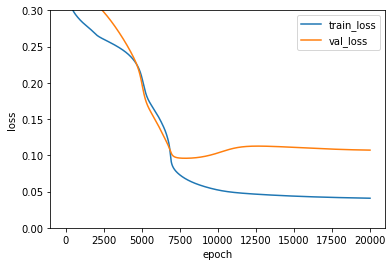

In [257]:
plt.ylim(0, 0.3)
plt.plot(dual_layer.losses)
plt.plot(dual_layer.val_losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

In [258]:
class RandomInitNetwork(DualLayer):
    
    def init_weights(self, n_features):
        np.random.seed(42)
        self.w1 = np.random.normal(0,1,(n_features, self.units))
        self.b1 = np.zeros(self.units)
        
        self.w2 = np.random.normal(0,1,(self.units,1))
        self.b2 = 0

In [259]:
random_init_net = RandomInitNetwork(l2 = 0.01)
random_init_net.fit(x_train_scaled, y_train, x_val = x_val_scaled, y_val = y_val, epochs = 500)

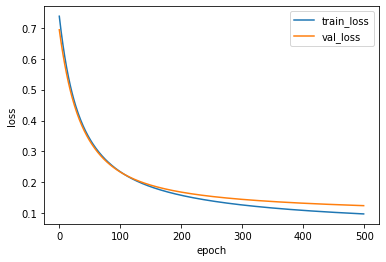

In [260]:
plt.plot(random_init_net.losses)
plt.plot(random_init_net.val_losses)
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train_loss","val_loss"])


In [261]:
class MinibatchNetwork(RandomInitNetwork):
    
    def __init__(self, units=10, batch_size=32, learning_rate=0.1, l1=0, l2=0):
        super().__init__(units, learning_rate, l1, l2)
        self.batch_size = batch_size     # 배치 크기
        
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        y_val = y_val.reshape(-1, 1)     # 타깃을 열 벡터로 바꿉니다.
        self.init_weights(x.shape[1])    # 은닉층과 출력층의 가중치를 초기화합니다.
        np.random.seed(42)
        # epochs만큼 반복합니다.
        for i in range(epochs):
            loss = 0
            # 제너레이터 함수에서 반환한 미니배치를 순환합니다.
            for x_batch, y_batch in self.gen_batch(x, y):
                y_batch = y_batch.reshape(-1, 1) # 타깃을 열 벡터로 바꿉니다.
                m = len(x_batch)                 # 샘플 개수를 저장합니다.
                a = self.training(x_batch, y_batch, m)
                # 안전한 로그 계산을 위해 클리핑합니다.
                a = np.clip(a, 1e-10, 1-1e-10)
                # 로그 손실과 규제 손실을 더하여 리스트에 추가합니다.
                loss += np.sum(-(y_batch*np.log(a) + (1-y_batch)*np.log(1-a)))
            self.losses.append((loss + self.reg_loss()) / len(x))
            # 검증 세트에 대한 손실을 계산합니다.
            self.update_val_loss(x_val, y_val)

    # 미니배치 제너레이터 함수
    def gen_batch(self, x, y):
        length = len(x)
        bins = length // self.batch_size # 미니배치 횟수
        if length % self.batch_size:
            bins += 1                    # 나누어 떨어지지 않을 때
        indexes = np.random.permutation(np.arange(len(x))) # 인덱스를 섞습니다.
        x = x[indexes]
        y = y[indexes]
        for i in range(bins):
            start = self.batch_size * i
            end = self.batch_size * (i + 1)
            yield x[start:end], y[start:end]   # batch_size만큼 슬라이싱하여 반환합니다.

In [262]:
minibatch_net = MinibatchNetwork(l2=0.01, batch_size=32)
minibatch_net.fit(x_train_scaled, y_train, 
                  x_val=x_val_scaled, y_val=y_val, epochs=500)
minibatch_net.score(x_val_scaled, y_val)

0.978021978021978

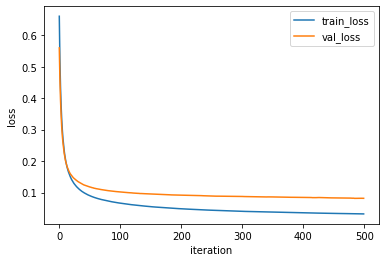

In [263]:
plt.plot(minibatch_net.losses)
plt.plot(minibatch_net.val_losses)
plt.ylabel('loss')
plt.xlabel('iteration')
plt.legend(['train_loss', 'val_loss'])
plt.show()

In [264]:
minibatch_net = MinibatchNetwork(l2=0.01, batch_size=128)
minibatch_net.fit(x_train_scaled, y_train, 
                  x_val=x_val_scaled, y_val=y_val, epochs=500)
minibatch_net.score(x_val_scaled, y_val)

0.978021978021978

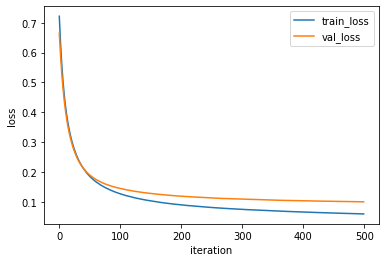

In [265]:
plt.plot(minibatch_net.losses)
plt.plot(minibatch_net.val_losses)
plt.ylabel('loss')
plt.xlabel('iteration')
plt.legend(['train_loss', 'val_loss'])
plt.show()

In [266]:
from sklearn.neural_network import MLPClassifier

In [267]:
dir(sklearn.neural_network)

['BernoulliRBM',
 'MLPClassifier',
 'MLPRegressor',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_multilayer_perceptron',
 '_rbm',
 '_stochastic_optimizers']

In [284]:
mlp = MLPClassifier(hidden_layer_sizes = (10,), activation = "logistic", solver = 'sgd', alpha = 0.01, batch_size = 32, learning_rate_init=0.1, max_iter = 500)

In [285]:
mlp.fit(x_train_scaled, y_train)
mlp.score(x_val_scaled, y_val)

0.989010989010989

In [2]:
class MultiClassNetwork:
    
    def __init__(self, units = 10, batch_size = 32, learing_rate = 0.1, l1 = 0, l2 =0):
        self.units = units
        self.batch_size = batch_size
        self.w1 = None
        self.w2 = None
        self.b1 = None
        self.b2 = None
        self.a1 = none
        self.losses = []
        self.val_losses = []
        self.lr = learning_rate
        self.l1 = l1
        self.l2 = l2
        
    def forpass(self,x):
        z1 = np.dot(x,self.w1)+self.b1
        self.a1 = self.sigmoid(z1)
        z2 = np.dot(self.a1,self.w2)+self.b2
        return z2
    
    def backprop(self,x,err):
        m = len(x)
        w2_grad = np.dot(self.a1.T, err) / m
        b2_grad = np.sum(err) / m
        # 시그모이드 함수까지 그래디언트를 계산합니다.
        err_to_hidden = np.dot(err, self.w2.T) * self.a1 * (1 - self.a1)
        # 은닉층의 가중치와 절편에 대한 그래디언트를 계산합니다.
        w1_grad = np.dot(x.T, err_to_hidden) / m
        b1_grad = np.sum(err_to_hidden, axis=0) / m
        return w1_grad, b1_grad, w2_grad, b2_grad
    
    def sigmoid(self,z):
        z = np.clip(z,-100,None)
        a = 1/(1+np.exp(-z))
        return a
    
    def softmax(self,z):
        z = np.clip(z, -100, None)
        exp_z = np.exp(z)
        return exp_z/np.sum(exp_z, axis = 1).reshape(-1,1)
    
    def init_weights(self, n_features, n_classes):
        self.w1 = np.random.normal(0,1,(n_features, self.units))
        self.b1 = np.zeros(self.units)
        self.w2 = np.random.normal(0,1,(self.units, n_classes))
        self.b2 = np.zeros(n_classes)
        
    def fit(self, x, y, epochs = 100, x_val = None, y_val = None):
        np.random.seed(42)
        self.init_weights(x.shape[1], y.shape[1])
        for i in range(epochs):
            loss = 0
            print('.', end = "")
            for x_batch, y_batch in self.gen_batch(x,y):
                a = self.training(x_batch, y_batch)
                a = np.clip(a,1e-10,1-1e-10)
                loss +=np.sum(-y_batch*np.log(a))
            self.losses.append((loss+self.reg_loss())/len(x))
            self.update_val_loss(x_val, y_val)
            
    def gen_batch(self,x,y):
        length = len(x)
        bins = length // self.batch_size
        if length % self.batch_size:
            bins +=1
            
        indexes = np.random.permutation(np.arange(len(x)))
        x = x[indexes]
        y = y[indexes]
        for i in range(bins):
            start = self.batch_size*i
            end = self.batch_size*(i+1)
            yield x[start:end], y[start:end]
            
    def training(self,x,y):
        m =len(x)
        z = self.forpass(x)
        a = self.softmax(z)
        err = -(y-a)
        
        w1_grad, b1_grad, w2_grad, b2_grad = self.backprop(x,err)
        
        w1_grad += (self.l1 * np.sign(self.w1) + self.l2 * self.w1) / m
        w2_grad += (self.l1 * np.sign(self.w2) + self.l2 * self.w2) / m
        
        self.w1 -=self.lr*w1_grad
        self.b1 -=self.lr*b1_grad
        
        self.w2 -=self.lr*w2_grad
        self.b2 -=self.lr*b2_grad
        
    def predict(self,x):
        z = self.forpass(x)
        return np.argmax(z, axis = 1)
    
    def score(self,x,y):
        return np.mean(self.predict(x) == np.argmax(y, axis = 1))
    
    def reg_loss(self):
        return self.l1 * (np.sum(np.abs(self.w1)) + np.sum(np.abs(self.w2))) + \
               self.l2 / 2 * (np.sum(self.w1**2) + np.sum(self.w2**2))

    def update_val_loss(self, x_val, y_val):
        z = self.forpass(x_val)
        a = self.softmax(z)
        a = np.clip(a, 1e-10, 1-1e-10)
        
        val_loss =np.sum(-y_val*np.log(a))
        self.val_losses.append((val_loss+self.reg_loss())/len(y_val))

In [2]:
! pip3 install tensorflow==1.5

ERROR: Could not find a version that satisfies the requirement tensorflow==1.5 (from versions: 2.5.0rc0, 2.5.0rc1, 2.5.0rc2, 2.5.0rc3, 2.5.0, 2.5.1, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0)
ERROR: No matching distribution found for tensorflow==1.5


In [5]:
% xcode-select --install

NameError: name 'xcode' is not defined